In [1]:
#Import Libraries

%matplotlib inline
from simulation import *
from scipy.special import comb
import numpy as np

Generating mGraph
----- DONE
Getting layout
----- DONE
Setting default attributes
----- DONE
Choosing the source
----- DONE
Choosing the monitoring nodes
----- DONE
Mlist :  [45, 0, 34, 47, 3] 
Slist :  [13]


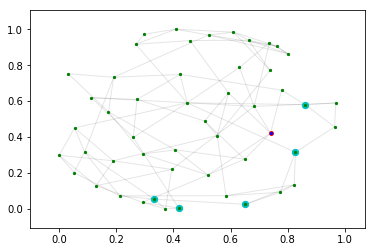

Starting infection


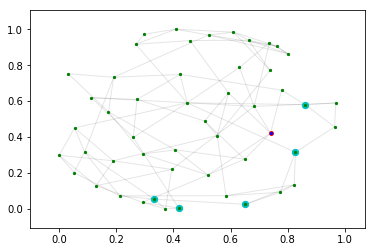

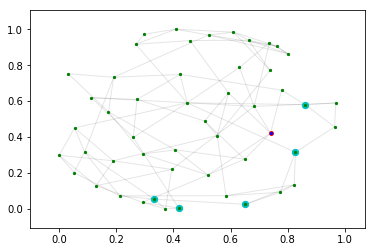

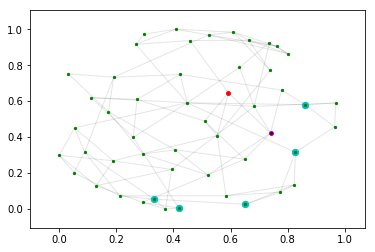

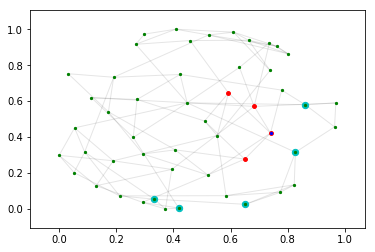

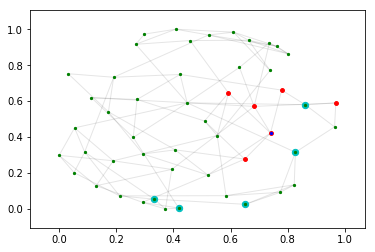

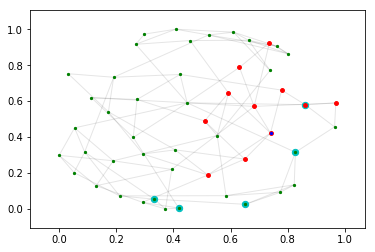

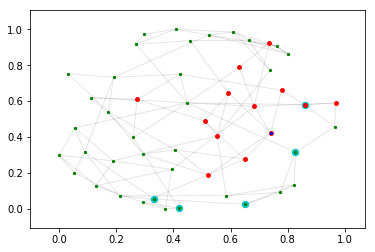

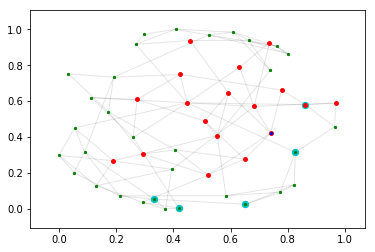

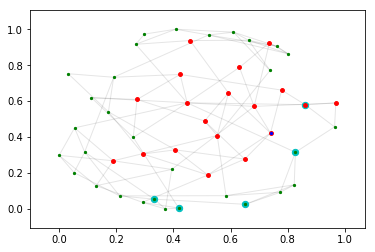

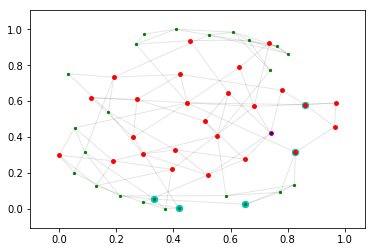

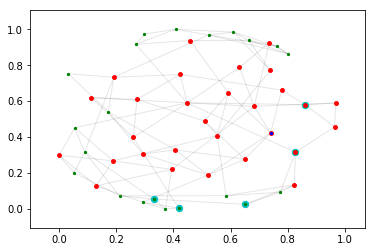

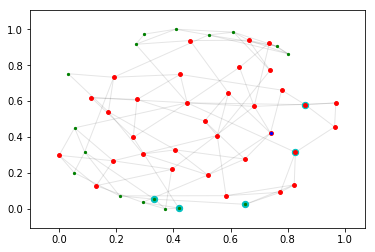

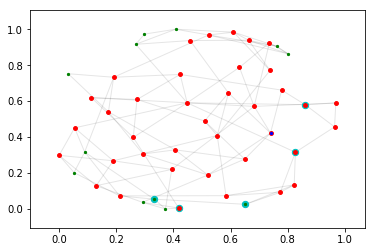

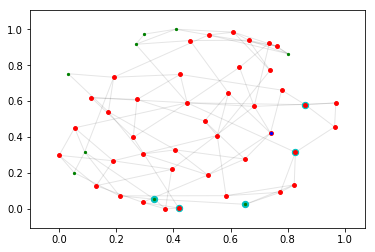

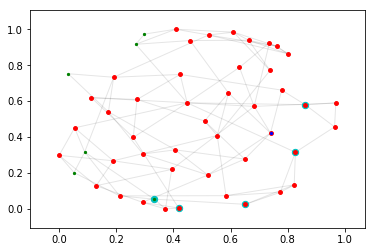

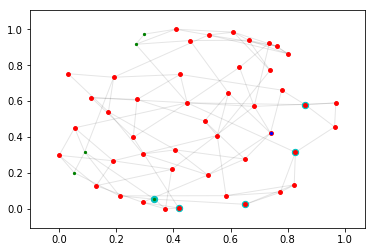

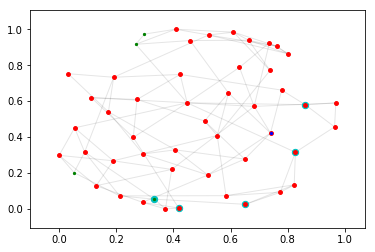

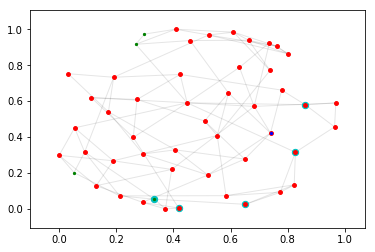

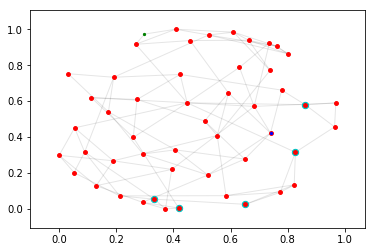

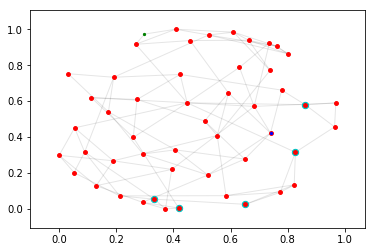

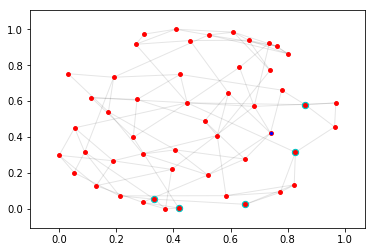

In [8]:
#Run the simulation

figureList = list()
# Parameters definition
numRumors = 1
maxThreshold = 1
numMonitors = 5
propagProba = 0.2
numNodes = 50
linkProba = 0.2
monitorTrigger = list()
numStep = 100

j=0

Graph, Pos, rumorSources, monitorsList = generateGraphReady(numNodes,linkProba,maxThreshold,numRumors,numMonitors)
fig1 =  drawColoredGraph(Graph, Pos, numRumors, rumorSources, monitorsList)
#fig1.savefig('./TestFigs/figT'+str(j)+'.png')
print("Starting infection")
infections = [[] for n in range(numRumors)]
infected = getInfectedList(Graph,numRumors)

while(not isAllInfected(Graph,numRumors)):

    Graph = infectionForward(Graph, propagProba, numRumors)
    infected = getInfectedList(Graph,numRumors)
    # j+1 because j=0 is step 1
    monitorTrigger = updateMonitorTrig(j+1,monitorTrigger,monitorsList,Graph,numRumors)
    j += 1
    fig2 = drawColoredGraph(Graph, Pos, numRumors, rumorSources, myMonitors=monitorsList,myIndex=j)
    
monitorTrigger2 = sorted(monitorTrigger, key=lambda x : (x[0], x[2]))

Real Source =  13
Detected Source =  [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 48, 49]


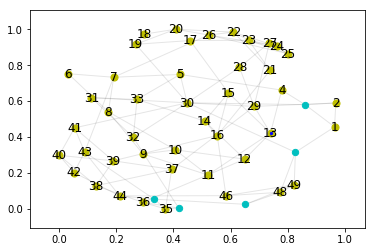

In [9]:
# Test with sets of nodes intersections
setList = []

for i in monitorTrigger:
    nodeSet = findSet2(Graph,i[0],i[2])
    setList.append(nodeSet)
    
finalSet = set.intersection(*setList)
print("Real Source = ",rumorSources[0])
print("Detected Source = ",list(finalSet))
finalList = list(finalSet)


fig = drawColoredGraph2(Graph,Pos,numRumors,rumorSources,monitorsList,finalList)
#fig.savefig('./TestFigs/figEND'+'png')

In [11]:
#

# Compute the probability that a monitor is infected by n steps by the possible sources.
sourceDict ={}

for source in finalList:
    sourceDict[source] = 0

for mInfo in monitorTrigger2:
    print("Monitor ",mInfo[0]," :")
    for source in finalList:
        prb = calculProba(propagProba,len(nx.shortest_path(Graph,source,mInfo[0]))-1,mInfo[2])
        sourceDict[source]+=prb
        print("Infected by node ",source," in ",mInfo[2]," steps with proba : ",prb)
        
 
 
       
scoreList = sorted(sourceDict,key=sourceDict.__getitem__,reverse=True)
#print(sourceDict)
#print(scoreList)
#print("position of the real source :", scoreList.index(*rumorSources)+1)
#print("number of candidates : ",len(scoreList))

Monitor  0  :
Infected by node  1  in  10  steps with proba :  0.8926258176000003
Infected by node  2  in  10  steps with proba :  0.6241903616000003
Infected by node  4  in  10  steps with proba :  0.32220047360000015
Infected by node  5  in  10  steps with proba :  0.6241903616000003
Infected by node  6  in  10  steps with proba :  0.12087388160000004
Infected by node  7  in  10  steps with proba :  0.32220047360000015
Infected by node  8  in  10  steps with proba :  0.12087388160000004
Infected by node  9  in  10  steps with proba :  0.03279349760000001
Infected by node  10  in  10  steps with proba :  0.03279349760000001
Infected by node  11  in  10  steps with proba :  0.12087388160000004
Infected by node  12  in  10  steps with proba :  0.12087388160000004
Infected by node  13  in  10  steps with proba :  0.32220047360000015
Infected by node  14  in  10  steps with proba :  0.12087388160000004
Infected by node  15  in  10  steps with proba :  0.12087388160000004
Infected by node 

 19  steps with proba :  0.9171337668563833
Infected by node  8  in  19  steps with proba :  0.7631106596003125
Infected by node  9  in  19  steps with proba :  0.5449112576542119
Infected by node  10  in  19  steps with proba :  0.5449112576542119
Infected by node  11  in  19  steps with proba :  0.7631106596003125
Infected by node  12  in  19  steps with proba :  0.5449112576542119
Infected by node  13  in  19  steps with proba :  0.5449112576542119
Infected by node  14  in  19  steps with proba :  0.5449112576542119
Infected by node  15  in  19  steps with proba :  0.5449112576542119
Infected by node  16  in  19  steps with proba :  0.7631106596003125
Infected by node  17  in  19  steps with proba :  0.32671185570811107
Infected by node  18  in  19  steps with proba :  0.32671185570811107
Infected by node  19  in  19  steps with proba :  0.5449112576542119
Infected by node  20  in  19  steps with proba :  0.5449112576542119
Infected by node  21  in  19  steps with proba :  0.5449112

In [ ]:
# C

# Compute the dictionnary of the path length for each possible sources to all the monitoring nodes
pathDict = {}

for source in finalList :
    #print('\n source : ',source,': \n')
    tempoDict = {}
    for target in monitorsList :
        #print(target,' : ',len(nx.shortest_path(Graph,source,target))-1)
        tempoDict[target] = len(nx.shortest_path(Graph,source,target))-1
    pathDict[source] =  tempoDict

# Compute number of steps in wich the monitor have been infected  
realSourceDict = {}
for i in range(int(len(monitorTrigger2)/numRumors)):
    #print('Monitor node : ', monitorTrigger2[i*numRumors][0],' path : ',monitorTrigger2[i*numRumors][2])
    realSourceDict[monitorTrigger2[i*numRumors][0]] = monitorTrigger2[i*numRumors][2]